In [6]:
%reload_ext autoreload
%autoreload 2

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from scipy.stats import ortho_group
import matplotlib.pyplot as plt

from dior import dior

%config InlineBackend.figure_formats = ['svg']

## Task 1: low-dimensional

In [8]:
np.random.seed(42)
D = 3
M = 2
target = ortho_group.rvs(D)[:,:M]
target = torch.from_numpy(target).double()

In [9]:
q = nn.Parameter((torch.randn(D, M)).double())
opt = optim.Adam([q], lr=0.005)

losses = []
qs = [(0, q.detach().clone())]

for j in range(1, 1000):
    
    Q, i = dior(q)
    loss = torch.sum((Q - target) ** 2)
    opt.zero_grad()
    loss.backward()
        
    if j % 100 == 0:
        print(f"Loss: {float(loss)} | Num iters: {i} | Grad norm: {torch.linalg.norm(q.grad)}")
        qs.append((j, q.detach().clone()))
    losses.append(float(loss))
    
    opt.step()

Loss: 2.341991155877487 | Num iters: 7 | Grad norm: 1.44111999868846
Loss: 0.9752139033375602 | Num iters: 8 | Grad norm: 1.2166428161366687
Loss: 0.22827988338112878 | Num iters: 9 | Grad norm: 0.6106233933793144
Loss: 0.042677223388458314 | Num iters: 11 | Grad norm: 0.19834264302462593
Loss: 0.010123879839668962 | Num iters: 12 | Grad norm: 0.08475104520374321
Loss: 0.002510651797854004 | Num iters: 12 | Grad norm: 0.04023196656538989
Loss: 0.0005933495588383303 | Num iters: 12 | Grad norm: 0.01913111824051051
Loss: 0.0001275833199692907 | Num iters: 13 | Grad norm: 0.008776788079230125
Loss: 2.4267351789903184e-05 | Num iters: 13 | Grad norm: 0.0038083584219147093


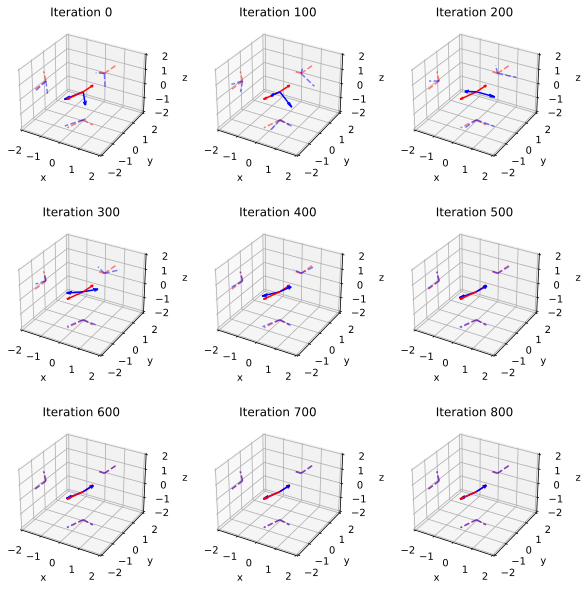

In [10]:
fig = plt.figure(figsize=(10, 10))

for i, j_q in enumerate(qs[:9]):
    
    j, q = j_q
    
    ax = fig.add_subplot(int(f"33{i+1}"), projection='3d')
    
    v1 = np.array([1, 2, 3])
    v2 = np.array([-2, 1, 4])
    for ci in range(target.shape[1]):
        ax.quiver(0, 0, 0, target[0, ci], target[1, ci], target[2, ci], color='r', arrow_length_ratio=0.2)
        ax.plot([-2, -2],           [0, target[1, ci]], [0, target[2, ci]], c="red", linestyle="--", alpha=0.5)
        ax.plot([0, target[0, ci]], [2, 2],           [0, target[2, ci]], c="red", linestyle="--", alpha=0.5)
        ax.plot([0, target[0, ci]], [0, target[1, ci]], [-2, -2], c="red", linestyle="--", alpha=0.5)
        
    learned = dior(q)[0].detach().numpy()
    
    for ci in range(target.shape[1]):
        ax.quiver(0, 0, 0, learned[0, ci], learned[1, ci], learned[2, ci], color='b', arrow_length_ratio=0.3)
        ax.plot([-2, -2],           [0, learned[1, ci]], [0, learned[2, ci]], c="b", linestyle="--", alpha=0.5)
        ax.plot([0, learned[0, ci]], [2, 2],           [0, learned[2, ci]], c="b", linestyle="--", alpha=0.5)
        ax.plot([0, learned[0, ci]], [0, learned[1, ci]], [-2, -2], c="b", linestyle="--", alpha=0.5)
    
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.set_zlim([-2, 2])
    ax.set_title(f"Iteration {j}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    
plt.subplots_adjust(hspace=0.4)
plt.savefig("3d_learning_process.png", dpi=300)

## Task 2: low-dimensional

In [11]:
np.random.seed(40)
D = 64
M = 20
target = ortho_group.rvs(D)[:,:M]
target = torch.from_numpy(target).double()

In [19]:
q = nn.Parameter((torch.randn(D, M)).double())
opt = optim.Adam([q], lr=0.1)

losses = []

for j in range(1, 1000):
    
    Q, i = dior(q)
    loss = torch.sum((Q - target) ** 2)
    opt.zero_grad()
    loss.backward()
        
    if j % 100 == 0:
        print(f"Loss: {float(loss)} | Num iters: {i} | Grad norm: {torch.linalg.norm(q.grad)}")
    losses.append(float(loss))
    
    opt.step()

Loss: 0.0028045543297501134 | Num iters: 11 | Grad norm: 0.007054859028339546
Loss: 6.023653782760153e-08 | Num iters: 11 | Grad norm: 3.458904615195707e-05
Loss: 1.8244204684692575e-12 | Num iters: 11 | Grad norm: 1.9089805031122147e-07
Loss: 5.625056130534229e-17 | Num iters: 11 | Grad norm: 1.0398179656444698e-09
Loss: 2.4549026389858756e-19 | Num iters: 11 | Grad norm: 5.590191286275246e-12
Loss: 2.438741471828667e-19 | Num iters: 11 | Grad norm: 2.697405446678848e-14
Loss: 2.438740878247732e-19 | Num iters: 11 | Grad norm: 6.882829152793098e-16
Loss: 2.4387408242001413e-19 | Num iters: 11 | Grad norm: 6.689984103215279e-16
Loss: 2.4387413114073295e-19 | Num iters: 11 | Grad norm: 6.432915189699663e-16


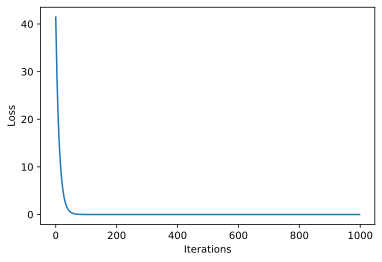

In [21]:
plt.plot(losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.savefig("64d_learning_process.png", dpi=300)